## 퍼셉트론 직접 만들기

In [5]:
# 임포트
import numpy as np

In [27]:
class Perceptron:
    def __init__(self, eta = 0.01, n_iter = 5, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    # fit은 모든 가중치를 초기화 하고 학습을 진행함
    def fit(self, x, y):
        rgen = np.random.RandomState(self.random_state)
        # normal에서  loc = 정규분포의 평균, scale = 표준편차, size = 생성할 난수의 개수 또는 배열 형
        self.w_ = rgen.normal(loc= 0.0,
                             scale = 0.01,
                             size = x.shape[1])
        self.b_ = np.float64(0.) # np.float_ 은 np.float64로 변경됨
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(x, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, x):
        """ 입력 계산 """
        return np.dot(x, self.w_) + self.b_

    def predict(self, x):
        """ 단위 계단 함수를 사용하여 클래스 레이블을 반환합니다. """
        return np.where(self.net_input(x) >= 0.0, 1, 0) # 활성화 같은데
    
   

In [8]:
# 확인
v1 = np.array([1, 2, 3])
v2 = 0.5 * v1
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))) # 코사인 유사도를 통해 얼마나 비슷한가를 알아냄
# np.arccos(): 역코사인 삼각 함수
# np.linalg.norm(): 벡터 길이를 계산하는 함수

np.float64(0.0)

## 붓꽃데이터셋 이진분류 하기

In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# 데이터셋 주소
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print("URL: ", s)

URL:  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [10]:
# 데이터셋 pandas로 불러오기 및 데이터 확인(tail_5)
df = pd.read_csv(s, header = None, encoding = 'utf-8')
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


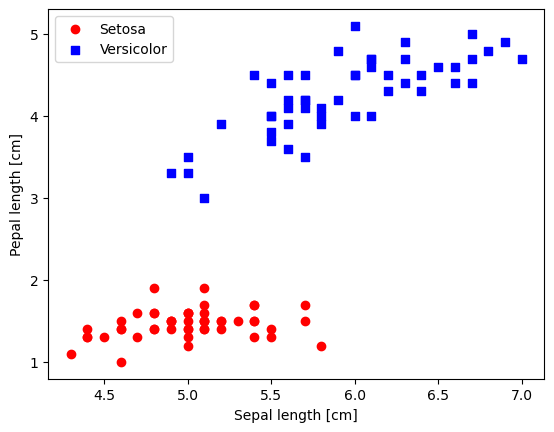

In [29]:
# 2진 분류를 위해 setosa, versicolor를 선택
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)
# 꽃받침 길이와 꽃잎 길이를 추출
x = df.iloc[0:100, [0, 2]].values
# 산점도 그리기
# 0~49 Setosa
# 50~99 vers
plt.scatter(x[:50, 0], x[:50, 1], color = 'red', marker='o', label = 'Setosa')
plt.scatter(x[50:100, 0], x[50:100, 1], color = 'blue', marker='s', label = 'Versicolor')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Pepal length [cm]')
plt.legend(loc = 'upper left')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

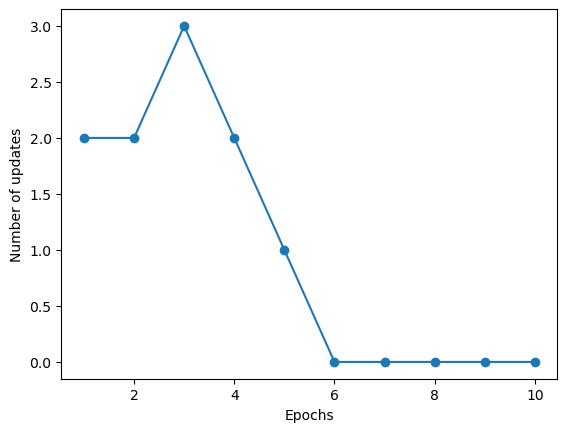

In [30]:
# 해당 붓꽃 데이터셋을 퍼셉트론으로 훈련
ppn = Perceptron(eta = 0.1, n_iter=10)
ppn.fit(x, y)
plt.plot(range(1, len(ppn.errors_) + 1), 
        ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show